In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVR

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Salary Data.csv')
print(df.shape)
df.head()

(375, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
for col in ('Gender', 'Education Level', 'Job Title'):
    print(f'for column {col}, there is {df[col].nunique()} unique values.')

for column Gender, there is 2 unique values.
for column Education Level, there is 3 unique values.
for column Job Title, there is 174 unique values.


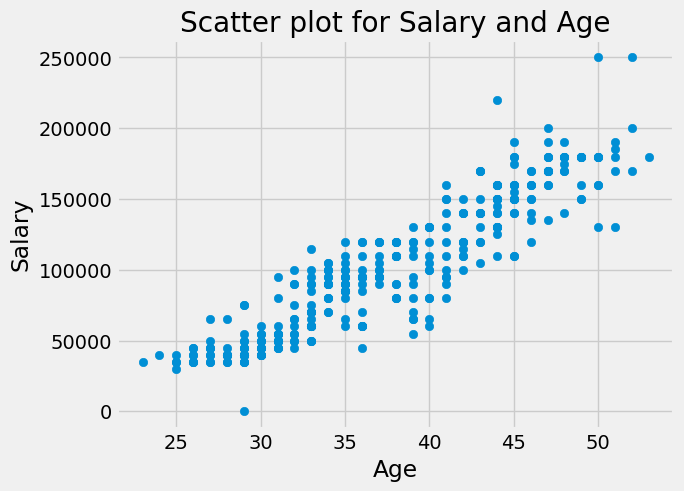

In [4]:
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter plot for Salary and Age')
plt.show()

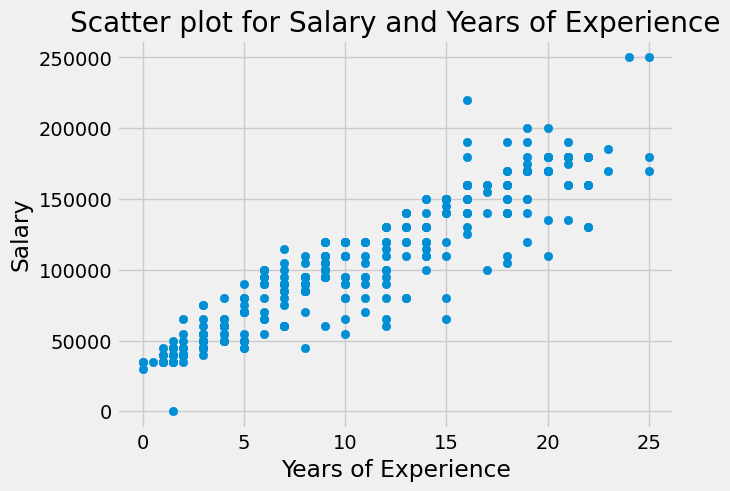

In [5]:
plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter plot for Salary and Years of Experience')
plt.show()

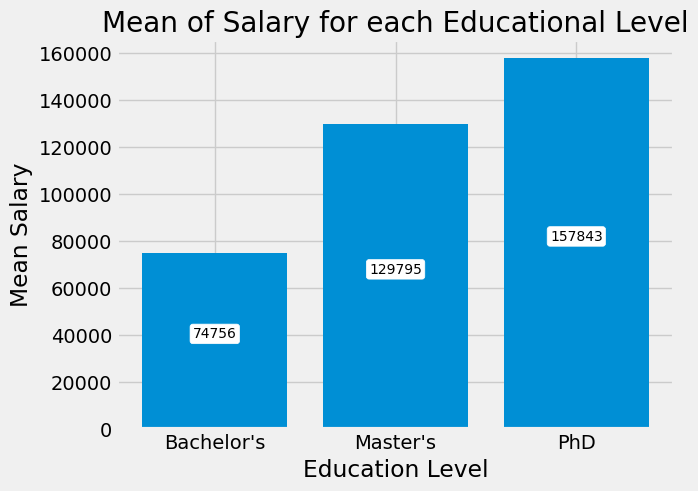

In [6]:

educationSalary = df.groupby('Education Level').agg({'Salary': lambda x: x.mean()}).reset_index()
bars = plt.bar(educationSalary['Education Level'], educationSalary['Salary'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.title('Mean of Salary for each Educational Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary')
plt.show()

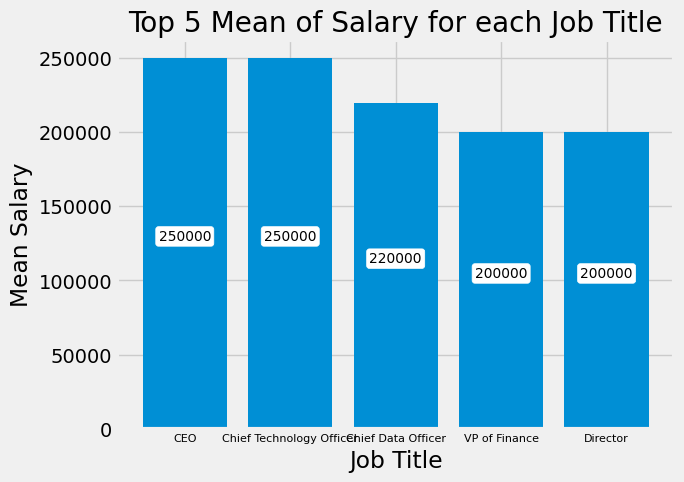

In [7]:
jobTitleSalary = df.groupby('Job Title').agg({'Salary': lambda x: x.mean()}).sort_values('Salary', ascending=False)[:5].reset_index()
bars = plt.bar(jobTitleSalary['Job Title'], jobTitleSalary['Salary'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.xticks(fontsize=8)
plt.title('Top 5 Mean of Salary for each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.show()

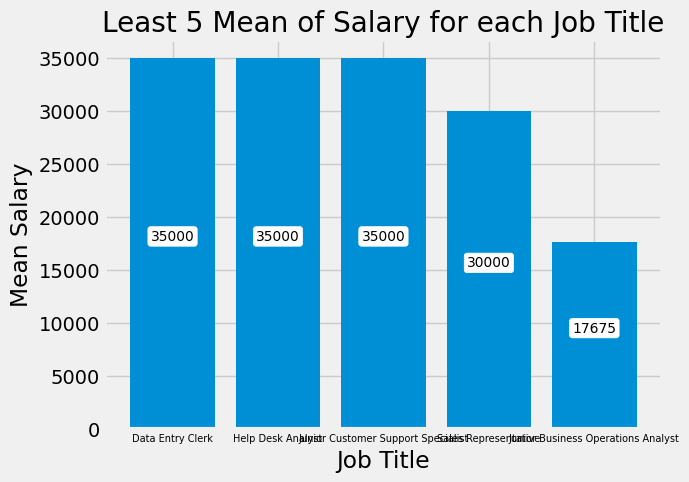

In [8]:
jobTitleSalary = df.groupby('Job Title').agg({'Salary': lambda x: x.mean()}).sort_values('Salary', ascending=False)[-5:].reset_index()
bars = plt.bar(jobTitleSalary['Job Title'], jobTitleSalary['Salary'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.xticks(fontsize=7)
plt.title('Least 5 Mean of Salary for each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.show()

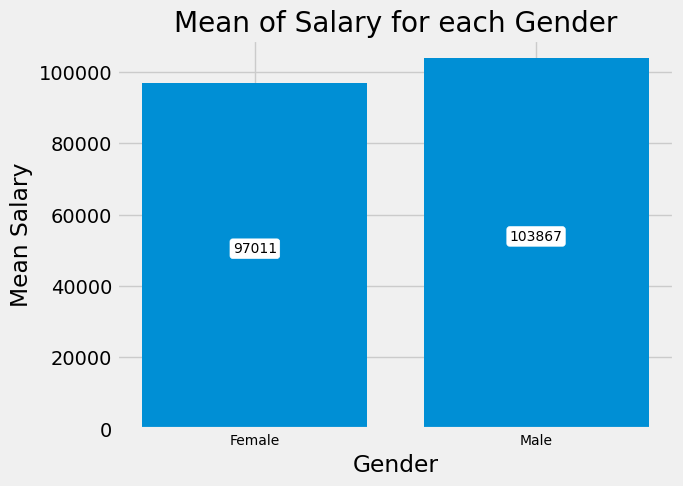

In [9]:
genderSalary = df.groupby('Gender').agg({'Salary': lambda x: x.mean()}).reset_index()
bars = plt.bar(genderSalary['Gender'], genderSalary['Salary'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.xticks(fontsize=10)
plt.title('Mean of Salary for each Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Salary')
plt.show()

In [37]:
import numpy as np

cat_features = ['Gender', 'Education Level', 'Job Title']
num_features = ['Age', 'Years of Experience']


df.dropna(inplace=True)

preprocess = ColumnTransformer([
    ('cat_transform', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), df.columns.get_indexer_for(cat_features)),
    ('num_features', MinMaxScaler(), df.columns.get_indexer_for(num_features)),
], remainder='passthrough', verbose=True)


pipeline = Pipeline([
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

X, y = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=.8)

pipeline.fit(X_train, y_train)

[ColumnTransformer] . (1 of 2) Processing cat_transform, total=   0.0s
[ColumnTransformer] .. (2 of 2) Processing num_features, total=   0.0s


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  array([1, 2, 3], dtype=int64)),
                                                 ('num_features',
                                                  MinMaxScaler(),
                                                  array([0, 4], dtype=int64))],
                                   verbose=True)),
                ('regressor', LinearRegression())])

In [11]:
pipeline.score(X_test, y_test)

0.9022265146103898

In [12]:
y_pred = pipeline.predict(X_test)
print((y_pred-y_test).mean())
print(np.concatenate([y_pred.reshape(-1, 1), y_test.reshape(-1,1)], axis=1))

-6395.754503441755
[[ 43458.88898197  40000.        ]
 [ 88297.03961304  95000.        ]
 [121465.36129249 110000.        ]
 [ 63581.78062771  75000.        ]
 [182056.4226713  180000.        ]
 [ 79503.60203553  90000.        ]
 [ 60306.02833645  70000.        ]
 [ 57075.89722713  50000.        ]
 [ 60423.94329886  70000.        ]
 [ 90748.12993433 100000.        ]
 [136415.72955139 110000.        ]
 [148701.70775148 150000.        ]
 [123106.10224459 110000.        ]
 [ 39494.5250554   40000.        ]
 [141306.80183145 160000.        ]
 [182056.4226713  180000.        ]
 [181113.102972   180000.        ]
 [125259.20055759 140000.        ]
 [ 89568.98031021  95000.        ]
 [138342.47987969 140000.        ]
 [ 40779.02769725  40000.        ]
 [151467.23797254 160000.        ]
 [ 90009.20007602 110000.        ]
 [ 81696.81127823 100000.        ]
 [ 41415.0296335   40000.        ]
 [158874.86929159 170000.        ]
 [140965.62100583 160000.        ]
 [135775.74138933 140000.        ]
 

In [21]:
param_distributions = {
    'LinearRegression': {
        'regressor__fit_intercept': [True, False],
    },
    'DecisionTreeRegressor': {
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21)
    },
    'ExtraTreeRegressor': {
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
    },
    # 'SVR': {
    #     'regressor__C': np.logspace(-4, 4, 9),
    #     'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #     'regressor__degree': np.arange(1, 6),
    #     'regressor__gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 6))
    # },
    'GradientBoostingRegressor': {
        'regressor__n_estimators': np.arange(50, 501, 50),
        'regressor__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
        'regressor__max_depth': np.arange(1, 11),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
        'regressor__subsample': np.linspace(0.5, 1, 6)
    },
    'RandomForestRegressor': {
        'regressor__n_estimators': np.arange(50, 501, 50),
        'regressor__max_depth': [None] + list(np.arange(1, 21)),
        'regressor__min_samples_split': np.arange(2, 21),
        'regressor__min_samples_leaf': np.arange(1, 21),
        'regressor__bootstrap': [True, False]
    },
    'Ridge': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__fit_intercept': [True, False],
        # 'regressor__normalize': [True, False]
    },
    'Lasso': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__fit_intercept': [True, False],
        # 'regressor__normalize': [True, False],
        'regressor__selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'regressor__alpha': np.logspace(-6, 6, 13),
        'regressor__l1_ratio': np.linspace(0, 1, 11),
        'regressor__fit_intercept': [True, False],
        'regressor__selection': ['cyclic', 'random']
    }
}

In [ ]:
best_models = dict()
best_params = dict()
best_score = dict()
for model in param_distributions.keys():
    print(model)
    pipeline.steps[1] = (f"regressor", eval(f"{model}()"))
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions[model],
                                       n_iter=50, cv=5, random_state=42)
    random_search.fit(X_train, y_train)
    best_models[model] = random_search.best_estimator_
    best_params[model] = random_search.best_params_
    best_score[model] = random_search.best_score_

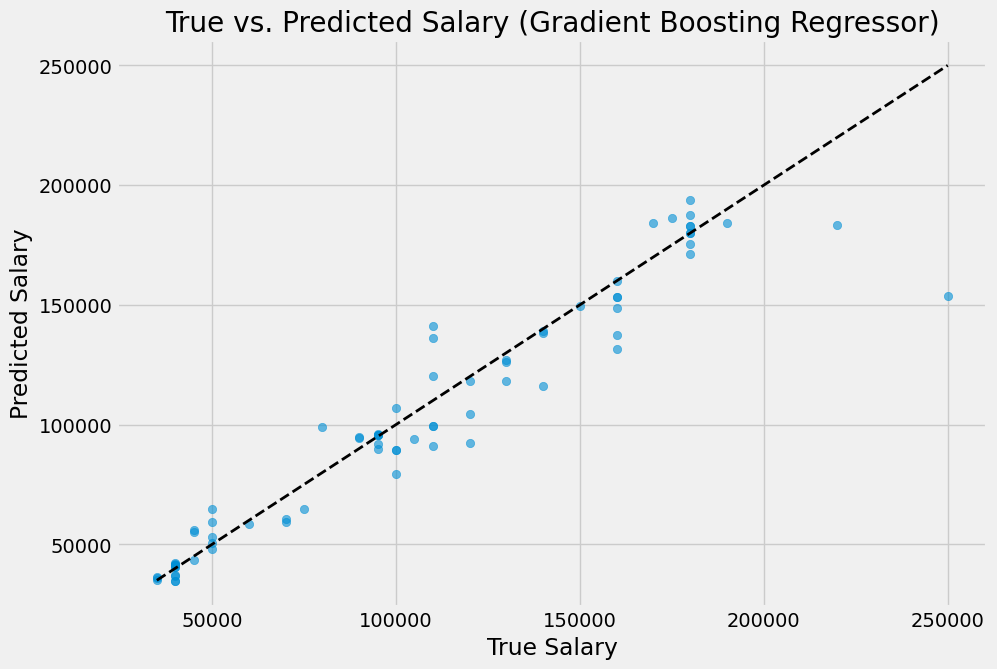

In [34]:
y_pred = best_models['GradientBoostingRegressor'].predict(X_test)

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('True vs. Predicted Salary (Gradient Boosting Regressor)')
plt.grid(True)
plt.show()

In [35]:
best_models['GradientBoostingRegressor']

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  array([1, 2, 3], dtype=int64)),
                                                 ('num_features',
                                                  MinMaxScaler(),
                                                  array([0, 4], dtype=int64))],
                                   verbose=True)),
                ('regressor',
                 GradientBoostingRegressor(max_depth=10, min_samples_leaf=16,
                                           min_samples_split=7,
                                           subsample=0.5))])

In [ ]:
pipeline.fit(X_train, y_train)

[ColumnTransformer] . (1 of 2) Processing cat_transform, total=   0.0s
[ColumnTransformer] .. (2 of 2) Processing num_features, total=   0.0s


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  array([1, 2, 3], dtype=int64)),
                                                 ('num_features',
                                                  MinMaxScaler(),
                                                  array([0, 4], dtype=int64))],
                                   verbose=True)),
                ('LinearRegression_regressor', LinearRegression())])